In [1]:
import numpy as np
import matplotlib.cm as cm
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from fuzzylearn import *
from fuzzylearn.fuzzifiers import LinearFuzzifier, CrispFuzzifier,ExponentialFuzzifier,QuantileLinearPiecewiseFuzzifier, QuantileConstantPiecewiseFuzzifier

source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(
    filepath_or_buffer=source,
    header=None,
    sep=',')

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # drops the empty line at file-end

iris_df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
iris_values = iris_df.iloc[:,0:4].values
iris_labels = iris_df.iloc[:,4].values

In [3]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(iris_values)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)

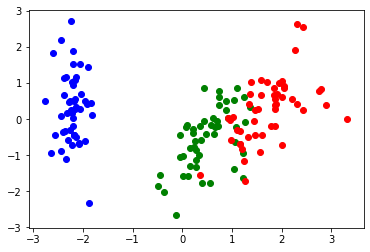

In [4]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'green', 'red')):
        plt.scatter(iris_values_2d[iris_labels==lab, 0],
                    iris_values_2d[iris_labels==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [5]:
def to_membership_values(labels, target):
    return [1 if l==target else 0 for l in labels]

mu = {}
for target in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    mu[target] = to_membership_values(iris_labels, target)

In [6]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .95), colors='k')
    plt.clabel(membership_contour, inline=1)

In [7]:
def generator(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

In [8]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [9]:
sigmas = [.225,.5]
parameters = parameters = {'c':[1,10,100],
                           'k':[GaussianKernel(i) for i in sigmas],
                          }

In [46]:
virginica = GridSearchCV(estimator=FuzzyInductor(sample_generator=generator,fuzzifier=LinearFuzzifier), param_grid=parameters, n_jobs=-1)
virginica.fit(iris_values_2d,mu['Iris-virginica'])

100%|██████████| 100/100 [00:39<00:00,  2.44it/s]


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=FuzzyInductor(c=1,
                                     fuzzifier=<class 'fuzzylearn.fuzzifiers.LinearFuzzifier'>,
                                     k=GaussianKernel(1), random_state=None,
                                     return_profile=False, return_vars=False,
                                     sample_generator=<function generator at 0x7fd288cc82f0>,
                                     solve_strategy=(<function solve_optimization_tensorflow at 0x7fd2d88c46a8>,
                                                     {})),
             iid='warn', n_jobs=-1,
             param_grid={'c': [1, 10, 100],
                         'k': [GaussianKernel(0.225), GaussianKernel(0.5)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

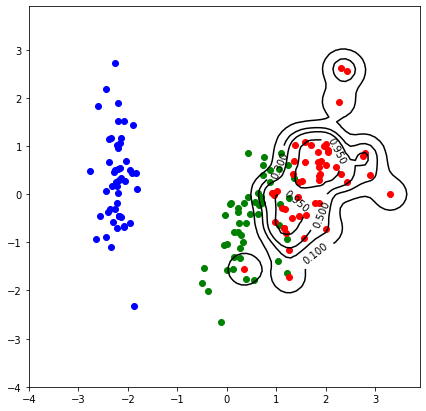

In [47]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(virginica.best_estimator_.estimated_membership_)
plt.show()

In [29]:
versicolor = GridSearchCV(estimator=FuzzyInductor(sample_generator=generator,fuzzifier=LinearFuzzifier), param_grid=parameters, n_jobs=-1)
versicolor.fit(iris_values_2d,mu['Iris-versicolor'])

100%|██████████| 100/100 [00:39<00:00,  2.52it/s]


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=FuzzyInductor(c=1,
                                     fuzzifier=<class 'fuzzylearn.fuzzifiers.LinearFuzzifier'>,
                                     k=GaussianKernel(1), random_state=None,
                                     return_profile=False, return_vars=False,
                                     sample_generator=<function generator at 0x7fd288cc82f0>,
                                     solve_strategy=(<function solve_optimization_tensorflow at 0x7fd2d88c46a8>,
                                                     {})),
             iid='warn', n_jobs=-1,
             param_grid={'c': [1, 10, 100],
                         'k': [GaussianKernel(0.225), GaussianKernel(0.5)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

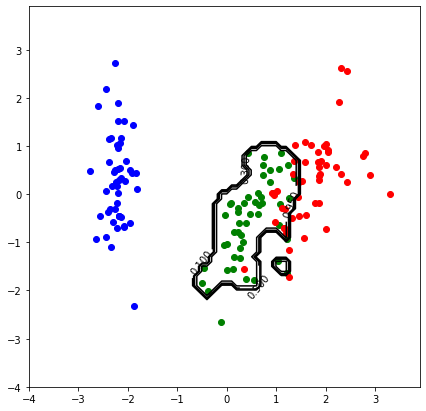

In [30]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(versicolor.best_estimator_.estimated_membership_)
plt.show()

In [31]:
setosa = GridSearchCV(estimator=FuzzyInductor(sample_generator=generator,fuzzifier=LinearFuzzifier), param_grid=parameters,n_jobs=-1)
setosa.fit(iris_values_2d,mu['Iris-setosa'])

100%|██████████| 100/100 [00:39<00:00,  2.85it/s]


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=FuzzyInductor(c=1,
                                     fuzzifier=<class 'fuzzylearn.fuzzifiers.LinearFuzzifier'>,
                                     k=GaussianKernel(1), random_state=None,
                                     return_profile=False, return_vars=False,
                                     sample_generator=<function generator at 0x7fd288cc82f0>,
                                     solve_strategy=(<function solve_optimization_tensorflow at 0x7fd2d88c46a8>,
                                                     {})),
             iid='warn', n_jobs=-1,
             param_grid={'c': [1, 10, 100],
                         'k': [GaussianKernel(0.225), GaussianKernel(0.5)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

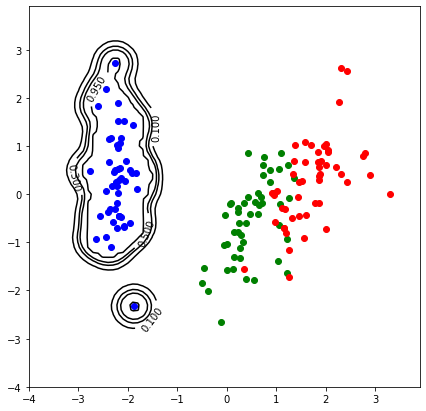

In [32]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(setosa.best_estimator_.estimated_membership_)
plt.show()

In [33]:
print("Setosa score: " + str(setosa.best_estimator_.score(iris_values_2d,mu['Iris-setosa'])) +
      "\nVirginica score: " + str(virginica.best_estimator_.score(iris_values_2d,mu['Iris-virginica']))
      +"\nVersicolor score: " + str(versicolor.best_estimator_.score(iris_values_2d,mu['Iris-versicolor'])))

Setosa score: -0.0
Virginica score: -0.07821985399970792
Versicolor score: -0.1


In [34]:
def classify(item):
    return sorted([(m(item), l)
                   for m, l in zip((virginica.best_estimator_.estimated_membership_,
                                    versicolor.best_estimator_.estimated_membership_,
                                    setosa.best_estimator_.estimated_membership_),
                              ('Iris-virginica', 'Iris-versicolor', 'Iris-setosa'))])[-1][1]

In [35]:
results = zip(range(len(iris_values_2d)), map(classify, iris_values_2d), iris_labels)
[r for r in results if r[1] != r[2]]

[(54, 'Iris-virginica', 'Iris-versicolor'),
 (60, 'Iris-virginica', 'Iris-versicolor'),
 (68, 'Iris-virginica', 'Iris-versicolor'),
 (72, 'Iris-virginica', 'Iris-versicolor'),
 (83, 'Iris-virginica', 'Iris-versicolor'),
 (106, 'Iris-versicolor', 'Iris-virginica'),
 (110, 'Iris-versicolor', 'Iris-virginica'),
 (121, 'Iris-versicolor', 'Iris-virginica'),
 (127, 'Iris-versicolor', 'Iris-virginica'),
 (137, 'Iris-versicolor', 'Iris-virginica'),
 (138, 'Iris-versicolor', 'Iris-virginica'),
 (149, 'Iris-versicolor', 'Iris-virginica')]

In [36]:
def get_generator(d):
    return lambda m: (-4 + np.random.random(d*m) * 8).reshape((m, d))
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

def classify(item, est_mu, classes):
    return sorted([(l, est_mu[l](item)) for l in classes], key=lambda i:i[1], reverse=True)[0][0]

def holdout(data_values, data_labels, classes,
            train_percentage, parameters, generator_factory,
            classify, num_holdouts):
  
    n = len(data_values)
    
    performance_train = performance_test = 0.0
    
    trials = range(num_holdouts)
    
    for trial in trials:
    
        permuted_indices = np.random.permutation(n)
        train_indices = permuted_indices[:int(n*train_percentage)]
        test_indices = permuted_indices[int(n*train_percentage):]
    
        train_values = [data_values[i] for i in train_indices]
        test_values = [data_values[i] for i in test_indices]
        
        train_values_arr = np.asarray(train_values)
    
        mu = {} 
        mu_train = {}
        mu_test = {}
    
        result = []
    
        for target in classes:
            mu[target] = to_membership_values(data_labels, target)
            mu_train[target] = [mu[target][i] for i in train_indices]
            mu_test[target] = [mu[target][i] for i in test_indices]
        
    
        labels_train = [data_labels[i] for i in train_indices]
        labels_test = [data_labels[i] for i in test_indices]
    
        est_mu = {}
        
        targets = classes
        
        for target in targets:
            clf = GridSearchCV(estimator=FuzzyInductor(sample_generator=generator_factory(c),fuzzifier=LinearFuzzifier), param_grid=parameters, n_jobs=-1)
            clf.fit(train_values_arr, mu_train[target])
            est_mu[target] = clf.best_estimator_.estimated_membership_

            if len(est_mu.values()) < len(classes):
                continue # at least one class not inferred
        
        results_train = list(zip(range(len(train_values)),
                            map(lambda item: classify(item, est_mu, classes),
                            train_values), labels_train))
        performance_train += 1.0 * len([r for r in results_train if r[1] != r[2]]) / len(results_train)
    
        results_test = list(zip(range(len(test_values)),
                           map(lambda item: classify(item, est_mu, classes),
                           test_values), labels_test))
    
        performance_test += 1.0 * len([r for r in results_test if r[1] != r[2]]) / len(results_test)
        
    return (performance_train/num_holdouts, performance_test/num_holdouts)

In [37]:
classes = ('Iris-virginica','Iris-versicolor','Iris-setosa')
train_percentage = 0.7
num_holdouts = 2

results_df = pd.DataFrame()

for c in range(2,5):
    pca = PCA(n_components=c)
    iris_values_tr = pca.fit_transform(iris_values_std)
    perf_train, perf_test = holdout(iris_values_tr,iris_labels,classes,
                                   train_percentage, parameters, get_generator,
                                   classify, num_holdouts)
    results_df = results_df.append({'components': c,
                                   'train': perf_train,
                                   'test': perf_test}, 
                                  ignore_index=True)

100%|██████████| 100/100 [00:28<00:00,  3.44it/s]


In [38]:
results_df

,components,test,train
0,2.0,0.066667,0.080952
1,3.0,0.100000,0.009524
2,4.0,0.044444,0.023810


In [10]:
def fuzzifier_table(fuzzifiers,columns,model_class, y, model_selection_grid, num_fold_grid_search, num_fold_cross_val, logger = None, scaling=StandardScaler(), dim_reduction=None):
    table = pd.DataFrame({str(columns):[None for f in fuzzifiers]},index=[fuzzifiers_to_string[f] for f in fuzzifiers])
    for fuzzifier in fuzzifiers:
        params_fuzzifier = model_selection_grid 
        params_fuzzifier['fuzzifier'] = [fuzzifier]
        score, _ = experiment(columns,model_class, y, params_fuzzifier, num_fold_grid_search, num_fold_cross_val, scaling=StandardScaler(), dim_reduction=None)
        table.loc[fuzzifiers_to_string[fuzzifier]][str(columns)] = score
    return table

In [11]:
def experiment(columns,model_class, y, model_selection_grid, num_fold_grid_search, num_fold_cross_val, logger = None, scaling=StandardScaler(), dim_reduction=None):
    grid = {}
    if logger is not None:
        logger.info('ESPERIMENTO CON %s',str(columns))
        
    dataset_values = iris_df[columns].values
    result, grid = train(FuzzyInductor,dataset_values,y,model_selection_grid,3,3)
    
    if logger is not None:
        logger.info('Score: %s',str(result.mean()))
        logger.info("FINE ESPERIMENTO\n")
    
    return np.mean(result[np.isfinite(result)]), grid

In [12]:
def train(model_class, X, y, model_selection_grid, num_fold_grid_search, num_fold_cross_val, logger = None, scaling=StandardScaler(), dim_reduction=None):
        
    if logger is not None:
        logger.info('Inizio Addestramento')
        
    X_std = scaling.fit_transform(X)  if scaling is not None else X
    
    X_std = dim_reduction.fit_transform(X_std) if dim_reduction is not None else X_std
    
    clf = GridSearchCV(estimator=model_class(), param_grid=model_selection_grid, cv=num_fold_grid_search, n_jobs=-1)
    clf.fit(X,y)
    
    grid = clf.best_params_
    for i, j in grid.items():
        grid[i] = str(j)

    val = cross_val_score(clf, X_std, y, cv=num_fold_cross_val)
    
    if logger is not None:
        logger.info('%s',str(clf.best_params_))
        logger.info('Scores: %s',str(val))
        logger.info("Fine addestramento")
        
    return val, grid

In [13]:
def iris_fuzzifier_table(classes,fuzzifiers,columns,model_class, y, model_selection_grid, num_fold_grid_search, num_fold_cross_val, logger = None, scaling=StandardScaler(), dim_reduction=None):
    table = pd.DataFrame(index=[fuzzifiers_to_string[f] for f in fuzzifiers])
    for target in classes:
        table[target] = fuzzifier_table(fuzzifiers,columns,model_class,y[target],model_selection_grid,num_fold_grid_search, num_fold_cross_val, logger = None, scaling=StandardScaler(),dim_reduction=dim_reduction)
    return table

In [84]:
fuzzifiers = [LinearFuzzifier,ExponentialFuzzifier, CrispFuzzifier, 
              QuantileConstantPiecewiseFuzzifier, QuantileLinearPiecewiseFuzzifier]
fuzzifiers_to_string = {LinearFuzzifier: "LinearFuzzifier",
                        ExponentialFuzzifier:"ExponentialFuzzifier",
                        CrispFuzzifier: "CrispFuzzifier",
                        QuantileConstantPiecewiseFuzzifier: " QuantileConstantPiecewiseFuzzifier",
                        QuantileLinearPiecewiseFuzzifier: "QuantileLinearPiecewiseFuzzifier"}

params_grid_noFuzzifier = {'c':[1,10,100],
       'k':[GaussianKernel(sigma) for sigma in sigmas],   
}

dim_red = PCA(n_components=2)
columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']

In [85]:
ift = iris_fuzzifier_table(classes,fuzzifiers,columns,FuzzyInductor,mu,params_grid_noFuzzifier,3,3,dim_reduction=dim_red)

100%|██████████| 100/100 [00:29<00:00,  3.28it/s]


In [88]:
ift

,Iris-virginica,Iris-versicolor,Iris-setosa
LinearFuzzifier,-0.342055,-0.240479,0
ExponentialFuzzifier,-0.325888,-0.330854,-1.45018e-13
CrispFuzzifier,-0.23,-0.17,0
QuantileConstantPiecewiseFuzzifier,-0.0725,-0.02625,-0.13
QuantileLinearPiecewiseFuzzifier,-0.0949999,-0.0371176,-0.160975
